###Extração dos Dados

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("budincsevity/szeged-weather")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'szeged-weather' dataset.
Path to dataset files: /kaggle/input/szeged-weather


In [ ]:
import pandas as pd

path = "/kaggle/input/szeged-weather/weatherHistory.csv" #Dados climaticos da cidade de Szeged na Hungria (2006-2016)

wind_data = pd.read_csv(path)

wind_data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [ ]:
wind_data.drop(columns=['Loud Cover'], inplace=True)

In [ ]:
wind_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Pressure (millibars)      96453 non-null  float64
 10  Daily Summary             96453 non-null  object 
dtypes: float64(7), object(4)
memory usage: 8.1+ MB


###Limpeza dos Dados

In [ ]:
wind_data['Formatted Date'] = pd.to_datetime(wind_data['Formatted Date'], utc=True) #Transforma a coluna no formato data e unifica os fusos horarios
wind_data.sort_values(by='Formatted Date', inplace=True) #Ordena o dataset por data que estava em ordem errada antes
wind_data.reset_index(drop=True, inplace=True) #Reseta os index para seguir a ordem crescente

In [ ]:
wind_data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2005-12-31 23:00:00+00:00,Partly Cloudy,rain,0.577778,-4.050000,0.89,17.1143,140.0,9.9820,1016.66,Mostly cloudy throughout the day.
1,2006-01-01 00:00:00+00:00,Mostly Cloudy,rain,1.161111,-3.238889,0.85,16.6152,139.0,9.9015,1016.15,Mostly cloudy throughout the day.
2,2006-01-01 01:00:00+00:00,Mostly Cloudy,rain,1.666667,-3.155556,0.82,20.2538,140.0,9.9015,1015.87,Mostly cloudy throughout the day.
3,2006-01-01 02:00:00+00:00,Overcast,rain,1.711111,-2.194444,0.82,14.4900,140.0,9.9015,1015.56,Mostly cloudy throughout the day.
4,2006-01-01 03:00:00+00:00,Mostly Cloudy,rain,1.183333,-2.744444,0.86,13.9426,134.0,9.9015,1014.98,Mostly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-12-31 18:00:00+00:00,Mostly Cloudy,rain,0.488889,-2.644444,0.86,9.7566,167.0,8.0178,1020.03,Mostly cloudy throughout the day.
96449,2016-12-31 19:00:00+00:00,Mostly Cloudy,rain,0.072222,-3.050000,0.88,9.4185,169.0,7.2450,1020.27,Mostly cloudy throughout the day.
96450,2016-12-31 20:00:00+00:00,Mostly Cloudy,snow,-0.233333,-3.377778,0.89,9.2736,175.0,9.5795,1020.50,Mostly cloudy throughout the day.
96451,2016-12-31 21:00:00+00:00,Mostly Cloudy,snow,-0.472222,-3.644444,0.91,9.2414,182.0,8.4042,1020.65,Mostly cloudy throughout the day.


In [ ]:
wind_data['Year'] = wind_data['Formatted Date'].dt.year
wind_data['Month'] = wind_data['Formatted Date'].dt.month
wind_data['Day'] = wind_data['Formatted Date'].dt.day
wind_data['Hour'] = wind_data['Formatted Date'].dt.hour
wind_data['Trimestre'] = wind_data['Formatted Date'].dt.quarter

In [ ]:
wind_data = wind_data.query('Year > 2005')

Classificando os Ventos conforme a Escala de Beaufort

In [ ]:
def classificar_beaufort(velocidade_kmh):
  if velocidade_kmh < 2: return 0
  elif velocidade_kmh <= 5: return 1
  elif velocidade_kmh <= 11: return 2
  elif velocidade_kmh <= 19: return 3
  elif velocidade_kmh <= 28: return 4
  elif velocidade_kmh <= 38: return 5
  elif velocidade_kmh <= 49: return 6
  elif velocidade_kmh <= 61: return 7
  elif velocidade_kmh <= 74: return 8
  elif velocidade_kmh <= 88: return 9
  elif velocidade_kmh <= 102: return 10
  elif velocidade_kmh <= 117: return 11
  else: return 12

def obter_designacao_beaufort(escala_beaufort):
  if escala_beaufort == 0: return "Calmo"
  elif escala_beaufort == 1: return "Aragem"
  elif escala_beaufort == 2: return "Brisa Leve"
  elif escala_beaufort == 3: return "Brisa Fraca"
  elif escala_beaufort == 4: return "Brisa Moderada"
  elif escala_beaufort == 5: return "Brisa Fresca"
  elif escala_beaufort == 6: return "Vento Fresco"
  elif escala_beaufort == 7: return "Vento Forte"
  elif escala_beaufort == 8: return "Vendaval"
  elif escala_beaufort == 9: return "Vendaval Forte"
  elif escala_beaufort == 10: return "Tempestade"
  elif escala_beaufort == 11: return "Tempestade Violenta"
  else: return "Furacão"

def obter_efeito_terra_beaufort(escala_beaufort):
  if escala_beaufort == 0: return "Fumaça sobe na vertical."
  elif escala_beaufort == 1: return "A fumaça indica a direção do vento."
  elif escala_beaufort == 2: return "As folhas das árvores se movem, sente-se o vento no rosto."
  elif escala_beaufort == 3: return "Folhas e galhos finos em constante movimento. Bandeiras desfraldadas."
  elif escala_beaufort == 4: return "Poeira e papéis soltos são levantados do chão."
  elif escala_beaufort == 5: return "Pequenas árvores começam a balançar."
  elif escala_beaufort == 6: return "Galhos grandes se movem. Dificuldade em usar guarda-chuva."
  elif escala_beaufort == 7: return "Árvores inteiras balançam. Dificuldade em andar contra o vento."
  elif escala_beaufort == 8: return "Galhos de árvores são quebrados. Pequenos danos estruturais."
  elif escala_beaufort == 9: return "Danos em telhados e chaminés."
  elif escala_beaufort == 10: return "Árvores arrancadas. Danos consideráveis em edifícios."
  elif escala_beaufort == 11: return "Destruição generalizada."
  else: return "Danos catastróficos."

In [ ]:
wind_data['Escala_Beaufort'] = wind_data['Wind Speed (km/h)'].apply(classificar_beaufort)
wind_data['Wind_Type'] = wind_data['Escala_Beaufort'].apply(obter_designacao_beaufort)
wind_data['Wind_Description'] = wind_data['Escala_Beaufort'].apply(obter_efeito_terra_beaufort)

/tmp/ipython-input-908119012.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-908119012.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-908119012.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
wind_data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Year,Month,Day,Hour,Trimestre,Escala_Beaufort,Wind_Type,Wind_Description
1,2006-01-01 00:00:00+00:00,Mostly Cloudy,rain,1.161111,-3.238889,0.85,16.6152,139.0,9.9015,1016.15,Mostly cloudy throughout the day.,2006,1,1,0,1,3,Brisa Fraca,Folhas e galhos finos em constante movimento. ...
2,2006-01-01 01:00:00+00:00,Mostly Cloudy,rain,1.666667,-3.155556,0.82,20.2538,140.0,9.9015,1015.87,Mostly cloudy throughout the day.,2006,1,1,1,1,4,Brisa Moderada,Poeira e papéis soltos são levantados do chão.
3,2006-01-01 02:00:00+00:00,Overcast,rain,1.711111,-2.194444,0.82,14.4900,140.0,9.9015,1015.56,Mostly cloudy throughout the day.,2006,1,1,2,1,3,Brisa Fraca,Folhas e galhos finos em constante movimento. ...
4,2006-01-01 03:00:00+00:00,Mostly Cloudy,rain,1.183333,-2.744444,0.86,13.9426,134.0,9.9015,1014.98,Mostly cloudy throughout the day.,2006,1,1,3,1,3,Brisa Fraca,Folhas e galhos finos em constante movimento. ...
5,2006-01-01 04:00:00+00:00,Mostly Cloudy,rain,1.205556,-3.072222,0.85,15.9068,149.0,9.9820,1014.08,Mostly cloudy throughout the day.,2006,1,1,4,1,3,Brisa Fraca,Folhas e galhos finos em constante movimento. ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-12-31 18:00:00+00:00,Mostly Cloudy,rain,0.488889,-2.644444,0.86,9.7566,167.0,8.0178,1020.03,Mostly cloudy throughout the day.,2016,12,31,18,4,2,Brisa Leve,"As folhas das árvores se movem, sente-se o ven..."
96449,2016-12-31 19:00:00+00:00,Mostly Cloudy,rain,0.072222,-3.050000,0.88,9.4185,169.0,7.2450,1020.27,Mostly cloudy throughout the day.,2016,12,31,19,4,2,Brisa Leve,"As folhas das árvores se movem, sente-se o ven..."
96450,2016-12-31 20:00:00+00:00,Mostly Cloudy,snow,-0.233333,-3.377778,0.89,9.2736,175.0,9.5795,1020.50,Mostly cloudy throughout the day.,2016,12,31,20,4,2,Brisa Leve,"As folhas das árvores se movem, sente-se o ven..."
96451,2016-12-31 21:00:00+00:00,Mostly Cloudy,snow,-0.472222,-3.644444,0.91,9.2414,182.0,8.4042,1020.65,Mostly cloudy throughout the day.,2016,12,31,21,4,2,Brisa Leve,"As folhas das árvores se movem, sente-se o ven..."


###Análises dos Dados

**Verifique quantos dias/hora de dados existem**

In [ ]:
days = wind_data['Formatted Date'].dt.date.nunique()
hours = len(wind_data)
years = wind_data['Year'].nunique()

print(f'Esse dataset contém dados de um total de {hours} horas, {days} dias e {years} anos')

Esse dataset contém dados de um total de 96452 horas, 4018 dias e 11 anos


**Calcule média, valor máximo e mínimo da velocidade do vento**

In [ ]:
wind_data['Wind Speed (km/h)'].describe()

,Wind Speed (km/h)
count,96452.000000
mean,10.810575
std,6.913577
min,0.000000
25%,5.828200
50%,9.965900
75%,14.135800
max,63.852600


**Categoria dos Tipos de Vento**

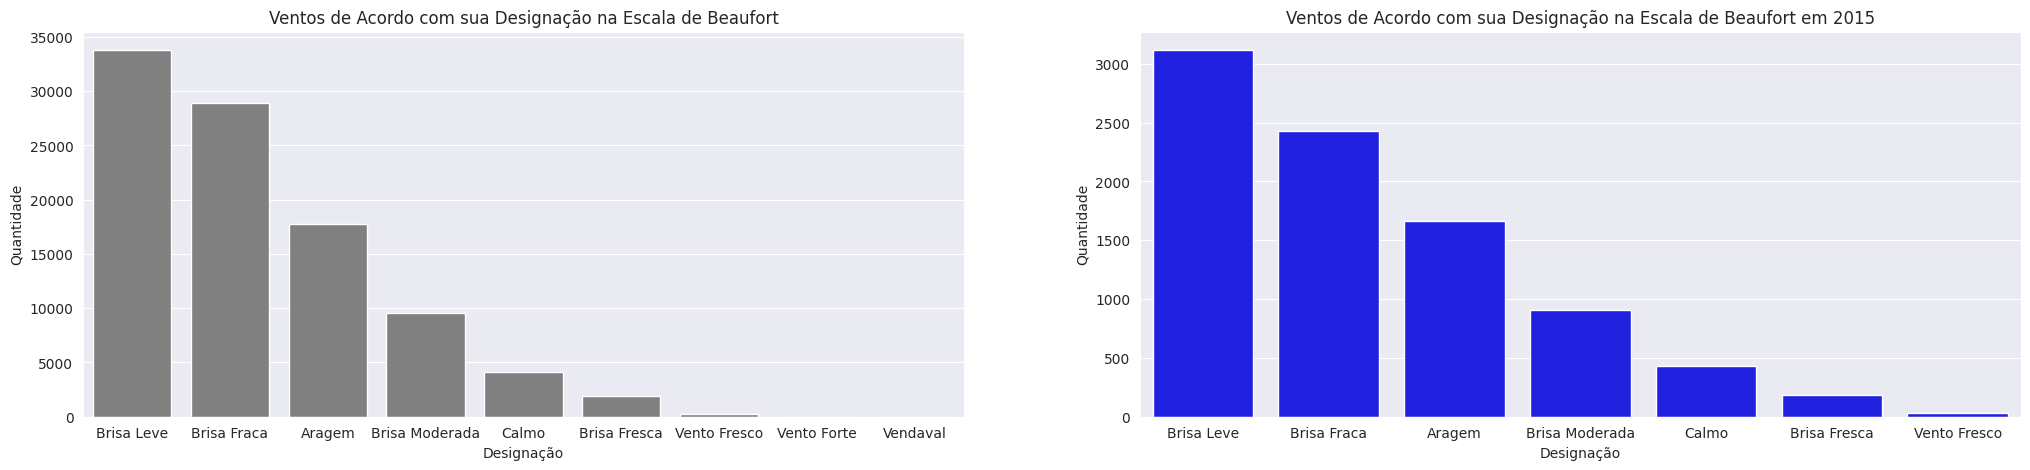

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

wind_type_count = wind_data.groupby('Wind_Type').size().reset_index(name='count').sort_values(by='count', ascending=False)
wind_type_count_2015 = wind_data.query('Year == 2015').groupby('Wind_Type').size().reset_index(name='count').sort_values(by='count', ascending=False)

plt.figure(figsize=(25, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=wind_type_count, x='Wind_Type', y='count', color='grey')
plt.title('Ventos de Acordo com sua Designação na Escala de Beaufort')
plt.xlabel('Designação')
plt.ylabel('Quantidade')

plt.subplot(1, 2, 2)
sns.barplot(data=wind_type_count_2015, x='Wind_Type', y='count', color='blue')
plt.title('Ventos de Acordo com sua Designação na Escala de Beaufort em 2015')
plt.xlabel('Designação')
plt.ylabel('Quantidade')

plt.show()

Aqui podemos identificar que em todo o periodo analisado o tipo de vento que mais se destaca são Brisa Leve e Brisa Fraca, se pegarmos um ano em especifico como 2015, é possivel observar o mesmo padrão de como a velocidade dos ventos são estáveis nessa região

In [ ]:
wind_data[['Escala_Beaufort', 'Wind_Type', 'Wind_Description']].drop_duplicates().sort_values(by='Escala_Beaufort').reset_index(drop=True)

,Escala_Beaufort,Wind_Type,Wind_Description
0,0,Calmo,Fumaça sobe na vertical.
1,1,Aragem,A fumaça indica a direção do vento.
2,2,Brisa Leve,"As folhas das árvores se movem, sente-se o ven..."
3,3,Brisa Fraca,Folhas e galhos finos em constante movimento. ...
4,4,Brisa Moderada,Poeira e papéis soltos são levantados do chão.
5,5,Brisa Fresca,Pequenas árvores começam a balançar.
6,6,Vento Fresco,Galhos grandes se movem. Dificuldade em usar g...
7,7,Vento Forte,Árvores inteiras balançam. Dificuldade em anda...
8,8,Vendaval,Galhos de árvores são quebrados. Pequenos dano...


**Faça um gráfico de linha mostrando a variação da velocidade do vento ao longo do tempo**

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

daily_wind_data = wind_data.set_index('Formatted Date')['Wind Speed (km/h)'].resample('D').mean().reset_index()

fig = make_subplots(
  rows=2,
  cols=1,
)

trace1 = go.Scatter(
  x=daily_wind_data['Formatted Date'],
  y=daily_wind_data['Wind Speed (km/h)'],
  mode='lines',
  name='Média Diária'
)
fig.add_trace(trace1, row=1, col=1)

trace2 = go.Scatter(
  x=daily_wind_data['Formatted Date'],
  y=daily_wind_data['Wind Speed (km/h)'],
  mode='lines',
  name='Média Diária'
)
fig.add_trace(trace2, row=2, col=1)

fig.update_layout(
  title_text="Análise da Velocidade do Vento",
  title_x=0.5,
  height=800, # Aumenta a altura total para acomodar os dois gráficos
  showlegend=False,
  template='plotly_dark'
)

fig.update_yaxes(title_text="Velocidade Média (km/h)", row=1, col=1)
fig.update_yaxes(title_text="Velocidade Média (km/h)", row=2, col=1)
fig.update_xaxes(title_text="Data", row=2, col=1)

fig.show()

**Amostra Selecionada no Gráfico:**

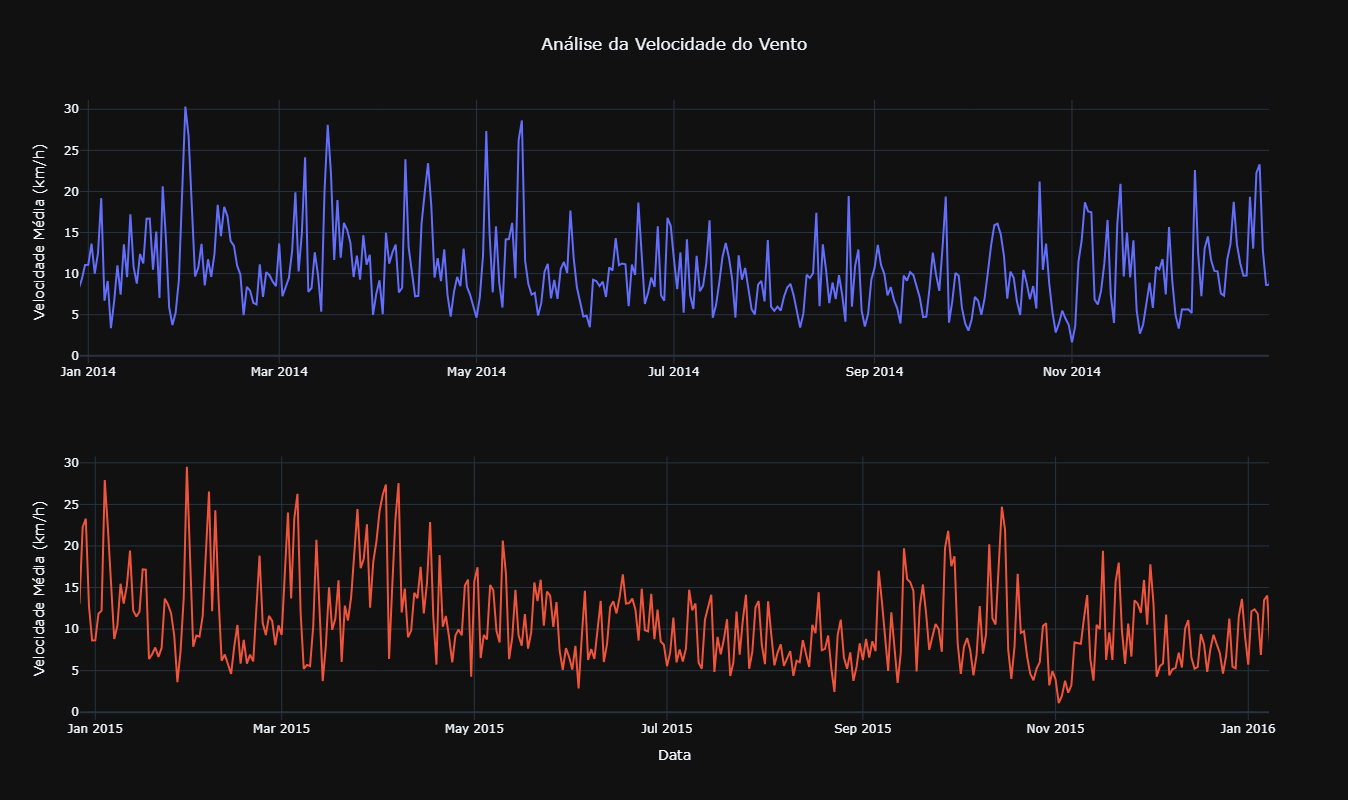

In [ ]:
wind_data.groupby('Trimestre')['Wind Speed (km/h)'].mean().reset_index()

,Trimestre,Wind Speed (km/h)
0,1,12.376576
1,2,10.822050
2,3,9.393881
3,4,10.680538


In [ ]:
wind_data.query('`Wind Speed (km/h)` > 60')

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Year,Month,Day,Hour,Trimestre,Escala_Beaufort,Wind_Type,Wind_Description
9445,2007-01-29 12:00:00+00:00,Dangerously Windy and Partly Cloudy,rain,8.944444,3.483333,0.49,63.8526,307.0,11.4471,1009.05,Mostly cloudy throughout the day and windy sta...,2007,1,29,12,1,8,Vendaval,Galhos de árvores são quebrados. Pequenos dano...


Comparando dois anos de ocorrencia dos ventos é possivel observar que os ventos são mais fortes normlamente no começo e final do ano e ventos mais baixos durante o meio do ano. Podemos identificar tambem que a maior velocidade atingida pelo vento nesse período todo foi de 63 km/h e ela ocorreu no dia 29 de Janeiro de 2007


**Faça um histograma da frequência das velocidades**

In [ ]:
wind_data_2015 = wind_data.query('Year == 2015')

fig = make_subplots(
  rows=2,
  cols=1,
  subplot_titles=(
    "Durante o período de 2006 - 2016",
    "Durante o período de 2015"
  )
)

trace1 = go.Histogram(
  x=wind_data['Wind Speed (km/h)'],
  nbinsx=10,
  name='Frequência Horária'
)
fig.add_trace(trace1, row=1, col=1)

trace2 = go.Histogram(
  x=wind_data_2015['Wind Speed (km/h)'],
  nbinsx=10,
  name='Frequência Horária'
)
fig.add_trace(trace2, row=2, col=1)

fig.update_layout(
  title_text="Distribuição de Frequência da Velocidade do Vento",
  title_x=0.5,
  height=800, # Aumenta a altura total para acomodar os dois gráficos
  showlegend=False,
  template='plotly_dark'
)

fig.update_yaxes(title_text="Velocidade Média (km/h)", row=1, col=1)
fig.update_yaxes(title_text="Velocidade Média (km/h)", row=2, col=1)
fig.update_xaxes(title_text="Velocidade do Vento (km/h)", row=2, col=1)

fig.show()

Com esse histograma é possivel observar que a maior ocorrencia da velocidade do vento esta entre 5 e 15 km/h tanto em todo o periodo de 11 anos como apenas no ano de 2015, classificando como uma velocidade estável durante grande parte do tempo

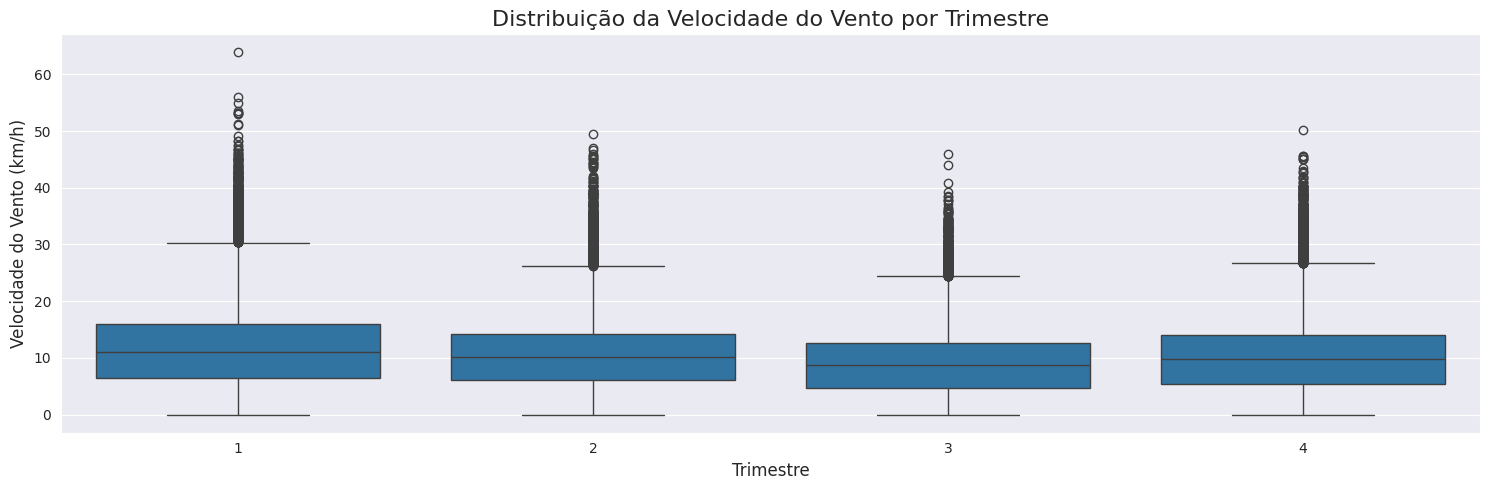

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(
  data=wind_data,
  x='Trimestre',
  y='Wind Speed (km/h)',
)

plt.title('Distribuição da Velocidade do Vento por Trimestre', fontsize=16)
plt.xlabel('Trimestre', fontsize=12)
plt.ylabel('Velocidade do Vento (km/h)', fontsize=12)
plt.tight_layout()
plt.show()

Aqui é possivel ter uma visão mais clara de como a velocidade varia conforme o período do ano sendo os ventos mais fortes durante o Inverno (1º Semestre) e os mais fracos durante o Verão (3º Semestre)

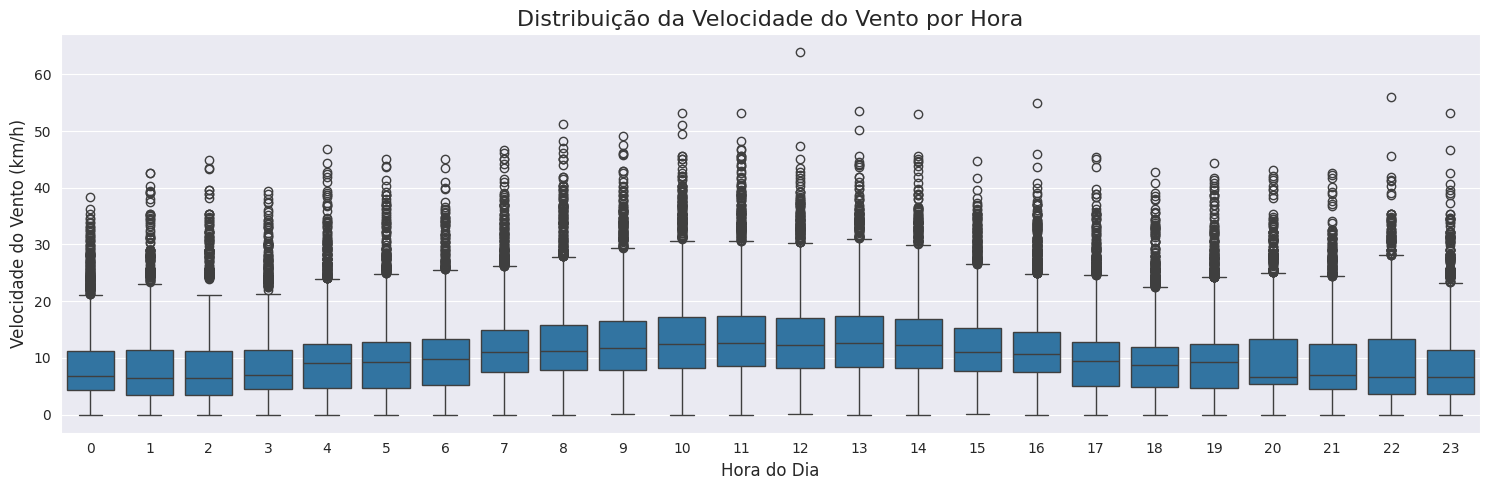

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(
  data=wind_data,
  x='Hour',
  y='Wind Speed (km/h)',
)

plt.title('Distribuição da Velocidade do Vento por Hora', fontsize=16)
plt.xlabel('Hora do Dia', fontsize=12)
plt.ylabel('Velocidade do Vento (km/h)', fontsize=12)
plt.tight_layout()
plt.show()

E aqui conseguimos observar que os ventos são mais fortes entre as 7 da manha e 5 da tarde e que inclusive o vento mais forte ja registrado nessa cidade ocorreu ao meio dia, isso se deve ao aquecimento da superfície pelo sol durante o dia que causa convecção e diferenças de pressão, aumentando a velocidade do vento. Durante noite, a superfície esfria, o ar se estabiliza e os ventos diminuem

In [ ]:
bins_dir = [-1] + list(range(11, 350, 22)) + [361]
labels_dir = [
  'Norte (N)', 'Norte-Nordeste (NNE)', 'Nordeste (NE)', 'Leste-Nordeste (ENE)',
  'Leste (E)', 'Leste-Sudeste (ESE)', 'Sudeste (SE)', 'Sul-Sudeste (SSE)',
  'Sul (S)', 'Sul-Sudoeste (SSW)', 'Sudoeste (SW)', 'Oeste-Sudoeste (WSW)',
  'Oeste (W)', 'Oeste-Noroeste (WNW)', 'Noroeste (NW)', 'Norte-Noroeste (NNW)',
  'Norte (N)'
]
wind_data['Wind_Direction'] = pd.cut(
  wind_data['Wind Bearing (degrees)'], bins=bins_dir, labels=labels_dir, ordered=False
)

bins_vel = [-1, 10, 20, 30, 40, 50, 65]
labels_vel = [
  '0-10 km/h', '10-20 km/h', '20-30 km/h',
  '30-40 km/h', '40-50 km/h', '50+ km/h'
]
wind_data['Wind_Speed_Category'] = pd.cut(
  wind_data['Wind Speed (km/h)'], bins=bins_vel, labels=labels_vel, ordered=False
)

# Agrupar por direção e velocidade, e contar as ocorrências
wind_rose_data = wind_data.groupby(['Wind_Direction', 'Wind_Speed_Category']).size().reset_index(name='frequency')

fig = px.bar_polar(
  wind_rose_data,
  r="frequency",             # O raio (comprimento) da barra é a contagem
  theta="Wind_Direction",    # A direção da barra
  color="Wind_Speed_Category", # A cor representa a categoria da velocidade do vento
  template="plotly_dark",
  title="Rosa dos Ventos - Frequência e Velocidade do Vento em Szeged",
  category_orders={"Wind_Speed_Category": labels_vel}
)

fig.update_layout(
  title_x=0.5,
  polar=dict(
    radialaxis=dict(
      showticklabels=True,
      ticks='outside',
      title_text="Frequência (Contagem de Horas)"
    ),
    angularaxis=dict(direction="clockwise")
  ),
  legend_title="Velocidade do Vento"
)

fig.show()

/tmp/ipython-input-2746529135.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-2746529135.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-2746529135.py:23: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



A cidade de Szeged vive sob a influência principal de um corredor de vento que se move entre o Nordeste e o Sudoeste, assim como é possivel observar que se você sentir um vento mais forte, existe uma boa chance de ele estar vindo do setor Norte/Noroeste.

**Conclusão**

O clima de vento em Szeged, Hungria, é caracterizado por um padrão consistente e previsível. Os ventos são, em sua vasta maioria, brisas leves a moderadas, raramente atingindo velocidades que causem preocupação. Existe um padrão diário claro, com ventos mais calmos na madrugada e mais intensos no início da tarde, e um padrão sazonal, com o inverno e a primavera (1º trimestre) trazendo os ventos mais fortes do ano. A direção do vento não é aleatória, soprando predominantemente de um corredor Nordeste-Sudoeste. Os ventos mais fortes, embora raros, tendem a vir mais do setor Norte e Noroeste, enquanto o vento do Leste é incomum.